In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def group_by_bodyparts(df):
    target = df
    arr = np.zeros(5)

    head = target.loc[0] + target.loc[1] + target.loc[2] + target.loc[3] + target.loc[4]
    arr[0] = head
    right_arm = target.loc[5] + target.loc[7] + target.loc[9]
    arr[1] = right_arm
    left_arm = target.loc[6] + target.loc[8] + target.loc[10]
    arr[2] = left_arm
    right_leg = target.loc[11] + target.loc[13] + target.loc[15]
    arr[3] = right_leg
    left_leg = target.loc[12] + target.loc[14] + target.loc[16]
    arr[4] = left_leg

    return arr

In [2]:

data1 = {}
data2 = {}
data3 = {}
data4 = {}
for i in range(1, 5):
    data_0 = pd.read_csv(f'gradcam_heatmaps/B_tp_label_0/cnt_{i}.csv')
    data_1 = pd.read_csv(f'gradcam_heatmaps/B_tp_label_1/cnt_{i}.csv')
    data_2 = pd.read_csv(f'gradcam_heatmaps/B_tp_label_2/cnt_{i}.csv')

    badarr = group_by_bodyparts(data_0)
    goodarr = group_by_bodyparts(data_1)
    perfectarr = group_by_bodyparts(data_2)

    if i == 1:
        data1['bad'] = badarr
        data1['good'] = goodarr
        data1['perfect'] = perfectarr
    
    elif i == 2:
        data2['bad'] = badarr
        data2['good'] = goodarr
        data2['perfect'] = perfectarr
    
    elif i == 3:
        data3['bad'] = badarr
        data3['good'] = goodarr
        data3['perfect'] = perfectarr

    elif i == 4:
        data4['bad'] = badarr
        data4['good'] = goodarr
        data4['perfect'] = perfectarr

In [3]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
dfmrgd = pd.concat([df1, df2, df3, df4], axis=1)
dfmrgd.to_csv('stacked_bar_values.csv', index=False)


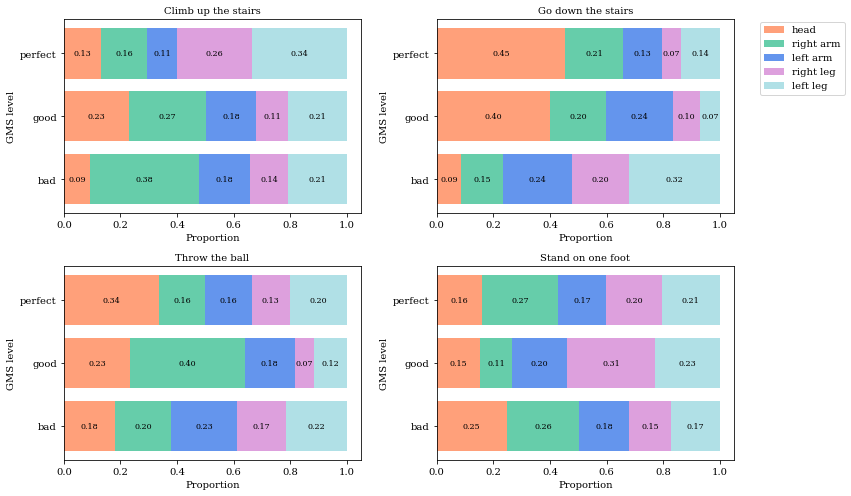

In [21]:
import seaborn as sns

# palette = sns.color_palette("tab20c", 10)
# palette = ['lightsalmon', 'mediumaquamarine', 'cornflowerblue', 'plum', 'powderblue']
palette = ['lightsalmon', 'mediumaquamarine', 'cornflowerblue', 'plum', 'powderblue']

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

action_keys = ['Climb up the stairs', 'Go down the stairs', 'Throw the ball', 'Stand on one foot']

data = {
    'Climb up the stairs': [data1['bad'], data1['good'], data1['perfect']],
    'Go down the stairs': [data2['bad'], data2['good'], data2['perfect']],
    'Throw the ball': [data3['bad'], data3['good'], data3['perfect']],
    'Stand on one foot': [data4['bad'], data4['good'], data4['perfect']],
}

colors = [palette[0], palette[1], palette[2], palette[3], palette[4]]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))
plt.subplots_adjust(wspace=100, hspace=1)

for i, ax in enumerate(axes.flatten()):
    key = action_keys[i]
    values = np.array(data[key])
    props = values / values.sum(axis=1)[:, np.newaxis]
    labels = ['bad', 'good', 'perfect']
    body_labels = ['head', 'right arm', 'left arm', 'right leg', 'left leg']
    bottom = np.zeros(props.shape[0])
    for j, prop in enumerate(props.T):
        bar = ax.barh(np.arange(props.shape[0]), prop, left=bottom, label=body_labels[j], color=colors[j])
        bottom += prop
        for k, rect in enumerate(bar):
            width = rect.get_width()
            ax.text(bottom[k]-width*0.5, rect.get_y()+rect.get_height()/2, '{:.2f}'.format(width), ha='center', va='center', color='black', fontsize=8)
    ax.set_title(key, ha='center', fontsize=10)
    ax.set_xlabel('Proportion', ha='center', fontsize=10)
    ax.set_ylabel('GMS level', ha='center', fontsize=10)
    ax.set_yticks(np.arange(props.shape[0]))
    ax.set_yticklabels(labels)

axes[0, 1].legend(loc='center', bbox_to_anchor=(1.23, 0.8))
# fig.legend(loc='right', bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()

plt.savefig('Supplement Figure 1.pdf',bbox_inches='tight', pad_inches=0, dpi=300, transparent=True, format='pdf')

In [5]:
data_df = pd.DataFrame(data)

In [6]:
data_df.to_csv('stacked_bar_chart_info.csv', index=False)